In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import spikeinterface as si
import spiketoolkit as st
import spikewidgets as sw

In [3]:
# Create a synthetic example
recording,sorting_true=sw.example_datasets.toy_example1(duration=600)

# MEArec
#rec_folder = '/home/alessio/Documents/Codes/MEArec/data/recordings/recordings_20cells_Neuronexus-32_10.0_10.0uV_15-10-2018:21:52'
#recording = si.MEArecRecordingExtractor(rec_folder)
#sorting_true = si.MEArecSortingExtractor(rec_folder)

In [4]:
# Do the spike sorting
# Note -- you should enable scrolling of the output for this cell
sorting=st.sorters.mountainsort4(
    freq_min=300,
    freq_max=6000,
    whiten=True,
    recording=recording,
    detect_sign=-1,
    adjacency_radius=-1,
    detect_threshold=3,
    noise_overlap_threshold=0.15
)

Using tmpdir: /tmp/tmp7w81tw8x
Preparing /tmp/tmp7w81tw8x/timeseries.hdf5...
Preparing neighborhood sorters (M=4, N=18000000)...
Detecting events on channel 1 (phase1)...
Num events detected on channel 1 (phase1): 9109
Computing PCA features for channel 1 (phase1)...
Clustering for channel 1 (phase1)...
Found 13 clusters for channel 1 (phase1)...
Computing templates for channel 1 (phase1)...
Re-assigning events for channel 1 (phase1)...
Re-assigning 67 events from 1 to 2 with dt=1 (k=1)
Re-assigning 2 events from 1 to 4 with dt=-9 (k=10)
Re-assigning 6 events from 1 to 3 with dt=-10 (k=11)
Detecting events on channel 2 (phase1)...
Num events detected on channel 2 (phase1): 23842
Computing PCA features for channel 2 (phase1)...
Clustering for channel 2 (phase1)...
Found 14 clusters for channel 2 (phase1)...
Computing templates for channel 2 (phase1)...
Re-assigning events for channel 2 (phase1)...
Re-assigning 9 events from 2 to 3 with dt=-1 (k=4)
Re-assigning 9 events from 2 to 3 with 

In [23]:
# Compare with ground truth
SC=st.comparison.SortingComparison(sorting, sorting_true, delta_tp=10)

In [24]:
sw.SortingComparisonTable(SC).display()

Unit ID,Accuracy,Best unit,Matched unit,f.n.,f.p.,# matches
2,1.00,1,1,0.00,0.00,1384
3,0.97,2,2,0.02,0.01,1382
4,0.97,5,5,0.02,0.01,1370
5,0.97,3,3,0.03,0.00,1351
6,1.00,4,4,0.00,0.00,1383
8,0.96,8,8,0.03,0.02,1386
9,0.63,9,9,0.37,0.00,879
11,0.96,6,6,0.03,0.00,1358
12,0.93,7,7,0.07,0.00,1298
13,0.07,7,-1,0.93,0.00,92


In [25]:
sw.SortingComparisonTable(SC, reference=2).display()

Unit ID,Accuracy,Best unit,Matched unit,f.n.,f.p.,# matches
1,1.00,2,2,0.00,0.00,1384
2,0.97,3,3,0.00,0.00,1382
3,0.97,5,5,0.02,0.01,1351
4,1.00,6,6,0.02,0.01,1383
5,0.97,4,4,0.03,0.00,1370
6,0.96,11,11,0.00,0.00,1358
7,0.93,12,12,0.00,0.00,1298
8,0.96,8,8,0.03,0.02,1386
9,0.63,9,9,0.37,0.00,879
10,0.98,15,15,0.00,0.00,1375


In [8]:
SC.getMappedSorting1().getMappedUnitIds()

[1, 2, 5, 3, 4, 8, 9, 6, 7, -1, 10, -1]

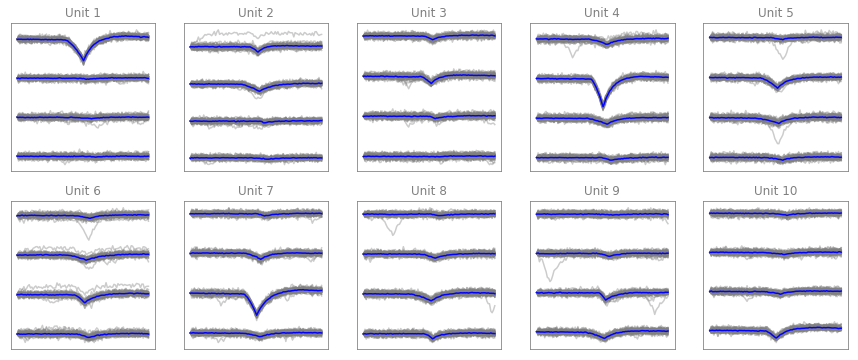

In [9]:
sw.UnitWaveformsWidget(recording=recording, sorting=sorting_true).plot()

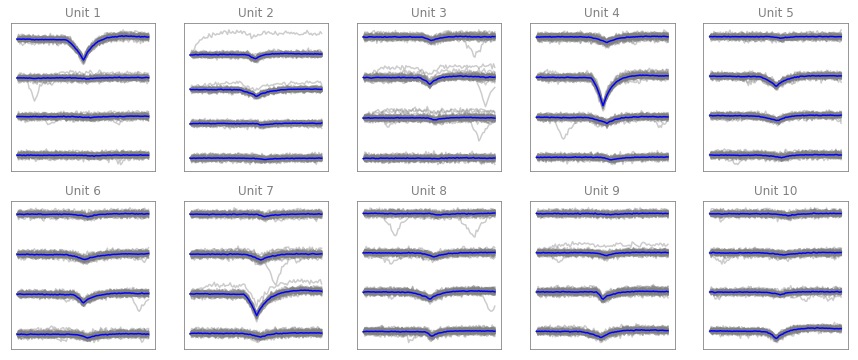

In [14]:
sw.UnitWaveformsWidget(recording=recording, sorting=SC.getMappedSorting2()).plot()

In [26]:
performance = st.comparison.compute_performance(SC)

PERFORMANCE: 

TP:  95.28909472465446  %
CL:  0.4269484043707938  %
FN:  4.283956870974745  %
FP (%ST1):  5.441783052319271  %
FP (%ST2):  5.375652298234327  %

ACCURACY:  90.73869900771776  %
SENSITIVITY:  95.69767441860465  %
MISS RATE:  4.3023255813953485  %
PRECISION:  94.59770114942529  %
FALSE DISCOVERY RATE:  5.402298850574713  %


Matched units:


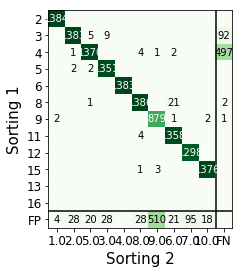

In [32]:
ax = SC.plotConfusionMatrix()